Part A: Classification using SVM (Basic Model)

First, we'll load the dataset, split it into training and testing sets, and standardize the features. Then, we'll train a basic SVM classifier with default parameters.

In [1]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# 2. Data Preparation [cite: 23]
# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data into training (70%) and testing (30%) sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize features 
# Scaling is important for SVM as it is sensitive to feature ranges
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


--- Basic SVM Model Evaluation ---
Accuracy: 0.9766

Confusion Matrix:
[[ 61   2]
 [  2 106]]


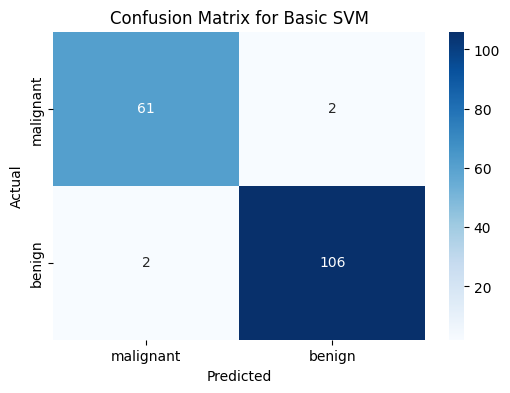

In [3]:
# 3. Model Training (Basic) [cite: 27]
# Train a basic SVM classifier with default parameters
basic_svm = SVC(random_state=42)
basic_svm.fit(X_train_scaled, y_train)

# 4. Evaluation 
y_pred_basic = basic_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_basic)
cm = confusion_matrix(y_test, y_pred_basic)

print("--- Basic SVM Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Basic SVM')
plt.show()

Part B: Hyperparameter Tuning

Now, we will use GridSearchCV and RandomizedSearchCV to find the optimal hyperparameters for our SVM model.

Code for GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

# 1. Define the parameter grid [cite: 33]
param_grid = {
    'C': [0.1, 1, 10],            # [cite: 36]
    'gamma': [0.001, 0.01, 0.1],   # [cite: 37]
    'kernel': ['rbf', 'poly']     # [cite: 38]
}

# 2. Perform GridSearchCV with 5-fold cross-validation 
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Record start time
start_time_grid = time.time()

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Record end time
end_time_grid = time.time()
grid_search_time = end_time_grid - start_time_grid

# 3. Record best parameters and score 
print("\n--- GridSearchCV Results ---")
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print(f"GridSearchCV runtime: {grid_search_time:.4f} seconds")

# Best model from GridSearchCV
best_svm_grid = grid_search.best_estimator_

Code for RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 1. Define wider parameter distributions 
param_dist = {
    'C': uniform(0.1, 100),  # A continuous distribution between 0.1 and 100.1
    'gamma': uniform(0.0001, 0.1),
    'kernel': ['rbf', 'poly']
}

# 2. Run RandomizedSearchCV 
# n_iter specifies the number of parameter combinations to try
random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=18,  # Same number of iterations as GridSearchCV for a fair comparison
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Record start time
start_time_random = time.time()

# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Record end time
end_time_random = time.time()
random_search_time = end_time_random - start_time_random

# 3. Highlight differences 
print("\n--- RandomizedSearchCV Results ---")
print(f"Best Parameters found: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")
print(f"RandomizedSearchCV runtime: {random_search_time:.4f} seconds")

Part C: Final Evaluation

We will now use the best model found by GridSearchCV (as it is often more thorough for small search spaces) to make predictions on the test set and perform a detailed evaluation.

In [ ]:
# 1. Predict on the test set with the best model 
y_pred_best = best_svm_grid.predict(X_test_scaled)

# 2. Compute and interpret metrics 
final_accuracy = accuracy_score(y_test, y_pred_best)
final_cm = confusion_matrix(y_test, y_pred_best)
classification_rep = classification_report(y_test, y_pred_best, target_names=cancer.target_names)

print("\n--- Final Model Evaluation (Best SVM) ---")
print(f"Final Accuracy on Test Set: {final_accuracy:.4f}")
print("\nFinal Confusion Matrix:")
print(final_cm)
print("\nClassification Report:")
print(classification_rep)

# Visualize the final confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Greens', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Tuned SVM')
plt.show()